## Перцептрон
### Цель работы
Познакомиться с перцептроном как с моделью обучения с учителем в библиотеке sklearn.

### Содержание работы
Сгенерируйте данные и обучите на них модель перцептрона. \
Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Сгенерируйте данные и обучите на них модель перцептрона.

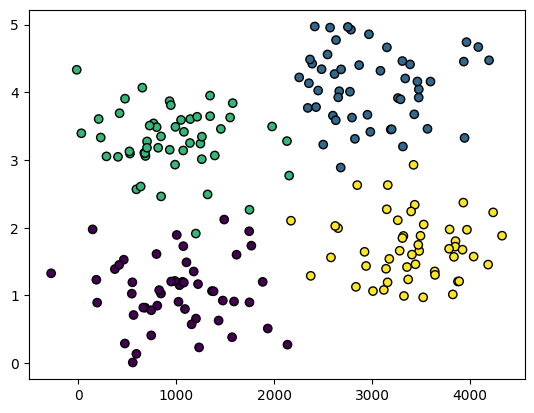

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [3]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

### 2. Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [4]:
from sklearn.metrics import confusion_matrix
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [5]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [6]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [7]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

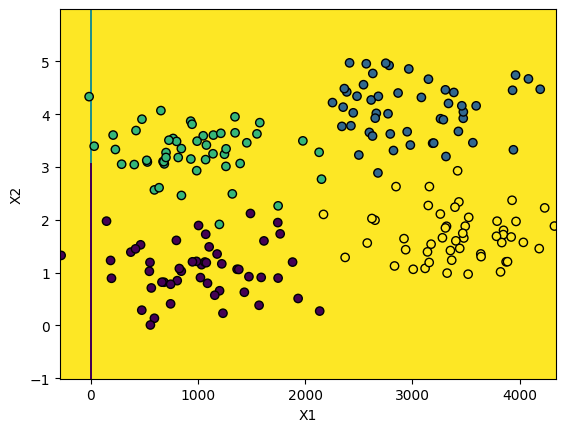

In [8]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Нормализация значений

In [9]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

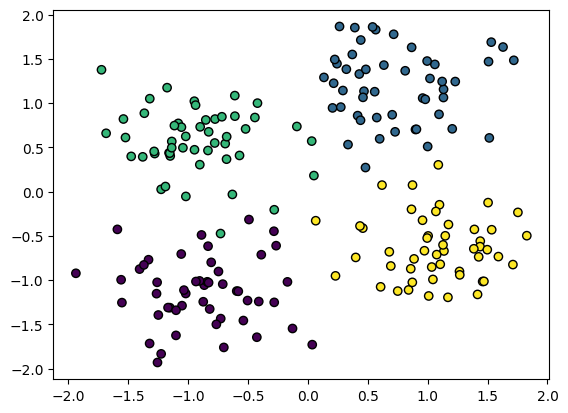

In [10]:
X_scaled = scaler.transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X_scaled, y)

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:

confusion_matrix(y, clf.predict(X_scaled))

array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]])

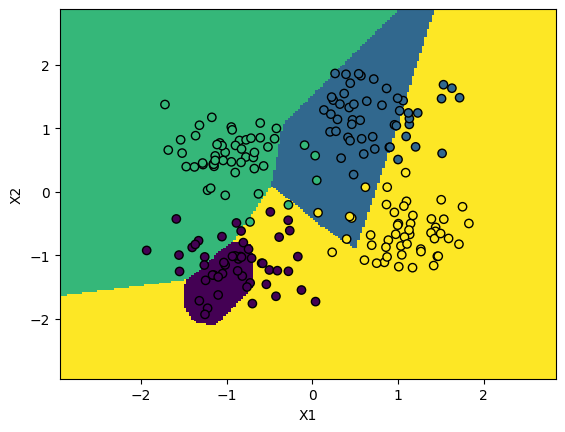

In [13]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [14]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.85816142
Iteration 2, loss = 1.85356472
Iteration 3, loss = 1.84899517
Iteration 4, loss = 1.84445499
Iteration 5, loss = 1.83994907
Iteration 6, loss = 1.83547529
Iteration 7, loss = 1.83103650
Iteration 8, loss = 1.82662694
Iteration 9, loss = 1.82224680
Iteration 10, loss = 1.81789568
Iteration 11, loss = 1.81357389
Iteration 12, loss = 1.80928214
Iteration 13, loss = 1.80502064
Iteration 14, loss = 1.80079041
Iteration 15, loss = 1.79659295
Iteration 16, loss = 1.79242635
Iteration 17, loss = 1.78829073
Iteration 18, loss = 1.78418544
Iteration 19, loss = 1.78011780
Iteration 20, loss = 1.77607927
Iteration 21, loss = 1.77206855
Iteration 22, loss = 1.76809071
Iteration 23, loss = 1.76414484
Iteration 24, loss = 1.76022829
Iteration 25, loss = 1.75634262
Iteration 26, loss = 1.75248646
Iteration 27, loss = 1.74866259
Iteration 28, loss = 1.74487236
Iteration 29, loss = 1.74111321
Iteration 30, loss = 1.73738525
Iteration 31, loss = 1.73368679
Iteration 32, los

In [15]:
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 1,  3, 46,  0],
       [ 0,  1,  0, 49]])

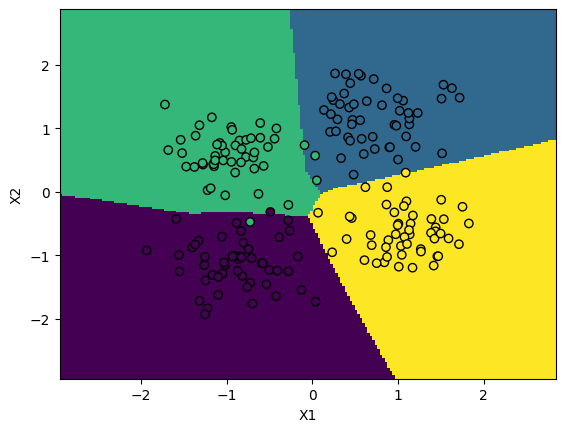

In [16]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10_000).fit(X_scaled, y)

In [18]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

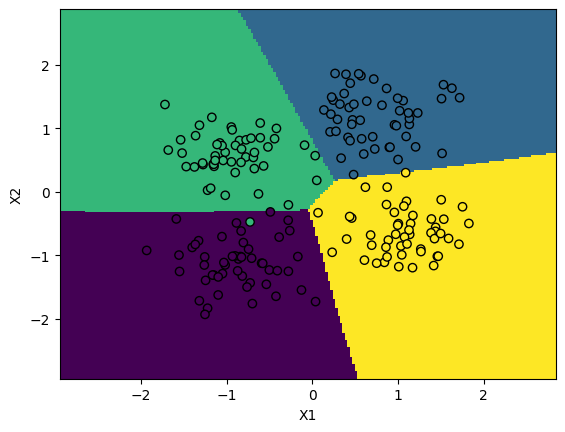

In [19]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Задания для самостоятельного выполнения
1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

In [35]:
clf_p1 = MLPClassifier(hidden_layer_sizes=(1,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.43885989
Iteration 2, loss = 1.43793103
Iteration 3, loss = 1.43700255
Iteration 4, loss = 1.43608085
Iteration 5, loss = 1.43516238
Iteration 6, loss = 1.43424456
Iteration 7, loss = 1.43332732
Iteration 8, loss = 1.43241062
Iteration 9, loss = 1.43149937
Iteration 10, loss = 1.43059277
Iteration 11, loss = 1.42968704
Iteration 12, loss = 1.42878211
Iteration 13, loss = 1.42788790
Iteration 14, loss = 1.42699544
Iteration 15, loss = 1.42610416
Iteration 16, loss = 1.42521395
Iteration 17, loss = 1.42432471
Iteration 18, loss = 1.42343637
Iteration 19, loss = 1.42254887
Iteration 20, loss = 1.42166216
Iteration 21, loss = 1.42077620
Iteration 22, loss = 1.41990248
Iteration 23, loss = 1.41903313
Iteration 24, loss = 1.41816525
Iteration 25, loss = 1.41729873
Iteration 26, loss = 1.41643344
Iteration 27, loss = 1.41556929
Iteration 28, loss = 1.41470621
Iteration 29, loss = 1.41384805
Iteration 30, loss = 1.41299662
Iteration 31, loss = 1.41215179
Iteration 32, los

In [36]:
confusion_matrix(y, clf_p1.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 32,  0, 18],
       [45,  0,  2,  3],
       [ 0, 35,  1, 14]])

In [37]:
clf_p1.score(X_scaled, y)

0.49

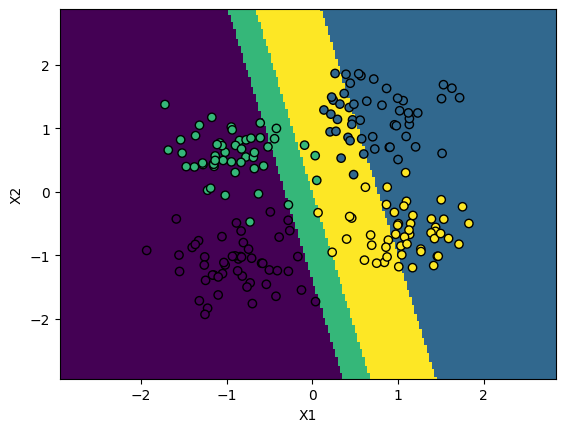

In [38]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_p1.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [39]:
clf_p2 = MLPClassifier(hidden_layer_sizes=(2,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.47442241
Iteration 2, loss = 1.47379080
Iteration 3, loss = 1.47316256
Iteration 4, loss = 1.47253776
Iteration 5, loss = 1.47190250
Iteration 6, loss = 1.47126319
Iteration 7, loss = 1.47062697
Iteration 8, loss = 1.46999405
Iteration 9, loss = 1.46936457
Iteration 10, loss = 1.46873865
Iteration 11, loss = 1.46811386
Iteration 12, loss = 1.46747317
Iteration 13, loss = 1.46681609
Iteration 14, loss = 1.46616129
Iteration 15, loss = 1.46550916
Iteration 16, loss = 1.46485998
Iteration 17, loss = 1.46419678
Iteration 18, loss = 1.46351451
Iteration 19, loss = 1.46283176
Iteration 20, loss = 1.46215081
Iteration 21, loss = 1.46147203
Iteration 22, loss = 1.46079575
Iteration 23, loss = 1.46012220
Iteration 24, loss = 1.45945159
Iteration 25, loss = 1.45878406
Iteration 26, loss = 1.45811973
Iteration 27, loss = 1.45744386
Iteration 28, loss = 1.45676503
Iteration 29, loss = 1.45608848
Iteration 30, loss = 1.45539908
Iteration 31, loss = 1.45470592
Iteration 32, los

In [40]:
confusion_matrix(y, clf_p2.predict(X_scaled))

array([[48,  0,  0,  2],
       [ 0, 50,  0,  0],
       [48,  2,  0,  0],
       [ 1,  0,  0, 49]])

In [41]:
clf_p2.score(X_scaled, y)

0.735

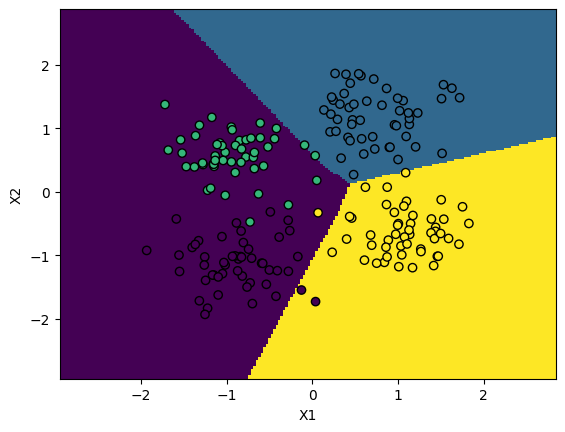

In [42]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_p2.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [43]:
clf_p100 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.42657562
Iteration 2, loss = 1.40981470
Iteration 3, loss = 1.39322673
Iteration 4, loss = 1.37682140
Iteration 5, loss = 1.36058853
Iteration 6, loss = 1.34453001
Iteration 7, loss = 1.32864128
Iteration 8, loss = 1.31291104
Iteration 9, loss = 1.29734421
Iteration 10, loss = 1.28194690
Iteration 11, loss = 1.26670547
Iteration 12, loss = 1.25160320
Iteration 13, loss = 1.23667419
Iteration 14, loss = 1.22190446
Iteration 15, loss = 1.20729500
Iteration 16, loss = 1.19283842
Iteration 17, loss = 1.17852823
Iteration 18, loss = 1.16435919
Iteration 19, loss = 1.15035243
Iteration 20, loss = 1.13648286
Iteration 21, loss = 1.12274468
Iteration 22, loss = 1.10915272
Iteration 23, loss = 1.09570002
Iteration 24, loss = 1.08237089
Iteration 25, loss = 1.06915010
Iteration 26, loss = 1.05604734
Iteration 27, loss = 1.04306678
Iteration 28, loss = 1.03020621
Iteration 29, loss = 1.01745079
Iteration 30, loss = 1.00480548
Iteration 31, loss = 0.99227841
Iteration 32, los

In [44]:
confusion_matrix(y, clf_p100.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

In [45]:
clf_p100.score(X_scaled, y)

0.995

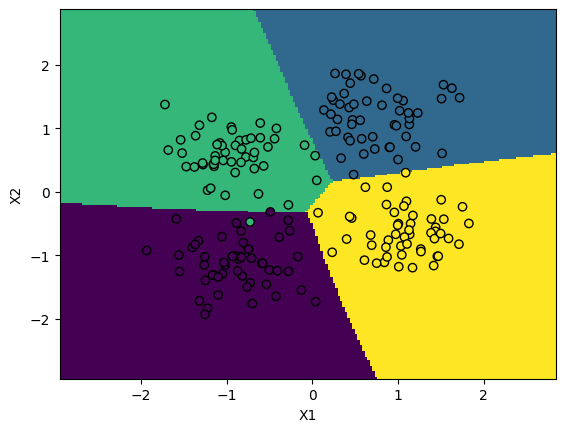

In [46]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_p100.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

In [47]:
clf_hidden2 = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.30173245
Iteration 2, loss = 1.29556834
Iteration 3, loss = 1.28941351
Iteration 4, loss = 1.28329374
Iteration 5, loss = 1.27719361
Iteration 6, loss = 1.27111685
Iteration 7, loss = 1.26506616
Iteration 8, loss = 1.25903926
Iteration 9, loss = 1.25304316
Iteration 10, loss = 1.24707274
Iteration 11, loss = 1.24112573
Iteration 12, loss = 1.23520891
Iteration 13, loss = 1.22930877
Iteration 14, loss = 1.22342679
Iteration 15, loss = 1.21758225
Iteration 16, loss = 1.21176550
Iteration 17, loss = 1.20598467
Iteration 18, loss = 1.20022719
Iteration 19, loss = 1.19449016
Iteration 20, loss = 1.18880672
Iteration 21, loss = 1.18315243
Iteration 22, loss = 1.17752333
Iteration 23, loss = 1.17193833
Iteration 24, loss = 1.16637688
Iteration 25, loss = 1.16083059
Iteration 26, loss = 1.15529815
Iteration 27, loss = 1.14978653
Iteration 28, loss = 1.14430279
Iteration 29, loss = 1.13884811
Iteration 30, loss = 1.13341718
Iteration 31, loss = 1.12798919
Iteration 32, los

In [48]:
confusion_matrix(y, clf_hidden2.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 1,  0,  0, 49]])

In [49]:
clf_hidden2.score(X_scaled, y)

0.99

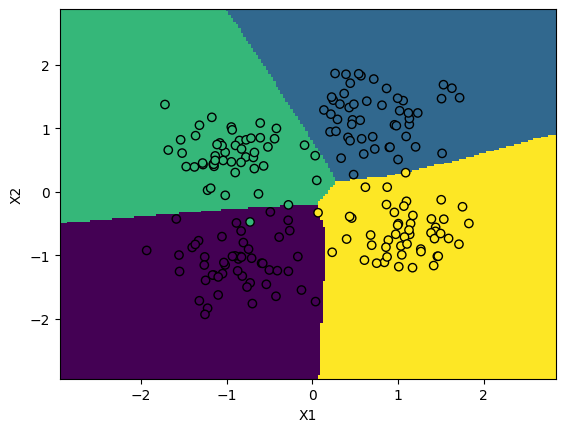

In [50]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_hidden2.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [51]:
clf_hidden3 = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.44541286
Iteration 2, loss = 1.43506530
Iteration 3, loss = 1.42501715
Iteration 4, loss = 1.41528526
Iteration 5, loss = 1.40576951
Iteration 6, loss = 1.39650012
Iteration 7, loss = 1.38755529
Iteration 8, loss = 1.37890272
Iteration 9, loss = 1.37056146
Iteration 10, loss = 1.36253516
Iteration 11, loss = 1.35479975
Iteration 12, loss = 1.34740879
Iteration 13, loss = 1.34021313
Iteration 14, loss = 1.33319477
Iteration 15, loss = 1.32640948
Iteration 16, loss = 1.31983088
Iteration 17, loss = 1.31344426
Iteration 18, loss = 1.30718347
Iteration 19, loss = 1.30099463
Iteration 20, loss = 1.29488056
Iteration 21, loss = 1.28886230
Iteration 22, loss = 1.28297346
Iteration 23, loss = 1.27723688
Iteration 24, loss = 1.27160717
Iteration 25, loss = 1.26605244
Iteration 26, loss = 1.26053768
Iteration 27, loss = 1.25505748
Iteration 28, loss = 1.24965301
Iteration 29, loss = 1.24428492
Iteration 30, loss = 1.23892992
Iteration 31, loss = 1.23355109
Iteration 32, los

In [52]:
confusion_matrix(y, clf_hidden3.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

In [54]:

clf_hidden3.score(X_scaled, y)

0.99

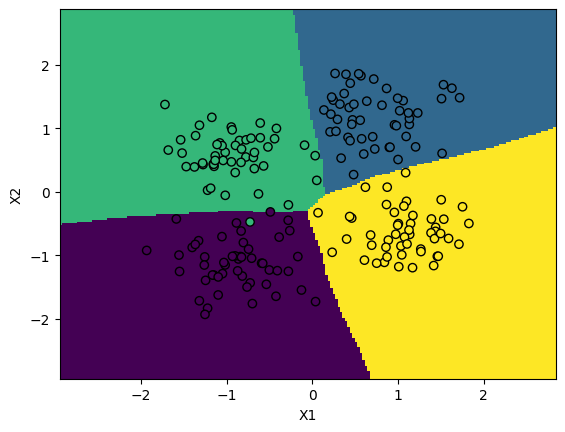

In [55]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_hidden3.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [56]:
clf_hidden10 = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)


Iteration 1, loss = 1.45196367
Iteration 2, loss = 1.44858789
Iteration 3, loss = 1.44571207
Iteration 4, loss = 1.44359478
Iteration 5, loss = 1.44152113
Iteration 6, loss = 1.43951121
Iteration 7, loss = 1.43756849
Iteration 8, loss = 1.43568801
Iteration 9, loss = 1.43386590
Iteration 10, loss = 1.43211468
Iteration 11, loss = 1.43041654
Iteration 12, loss = 1.42876925
Iteration 13, loss = 1.42716849
Iteration 14, loss = 1.42561194
Iteration 15, loss = 1.42409319
Iteration 16, loss = 1.42261051
Iteration 17, loss = 1.42116094
Iteration 18, loss = 1.41974253
Iteration 19, loss = 1.41835481
Iteration 20, loss = 1.41699688
Iteration 21, loss = 1.41566903
Iteration 22, loss = 1.41438952
Iteration 23, loss = 1.41317362
Iteration 24, loss = 1.41199601
Iteration 25, loss = 1.41083625
Iteration 26, loss = 1.40968776
Iteration 27, loss = 1.40854386
Iteration 28, loss = 1.40740619
Iteration 29, loss = 1.40627435
Iteration 30, loss = 1.40514038
Iteration 31, loss = 1.40400134
Iteration 32, los

In [57]:
confusion_matrix(y, clf_hidden10.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 0,  0, 50,  0],
       [ 0,  0,  0, 50]])

In [59]:
clf_hidden10.score(X_scaled, y)

1.0

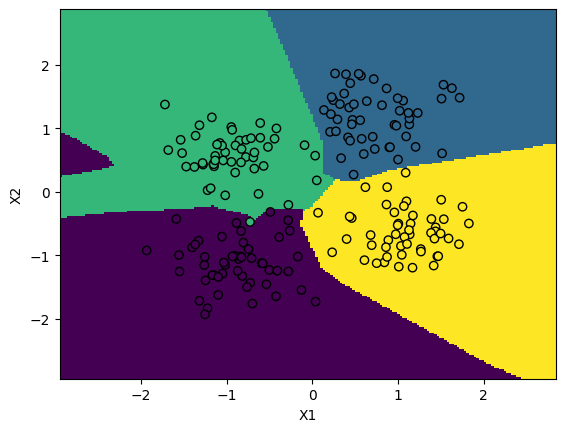

In [60]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_hidden10.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [61]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.48357228
Iteration 2, loss = 1.47780641
Iteration 3, loss = 1.47209438
Iteration 4, loss = 1.46643718
Iteration 5, loss = 1.46081360
Iteration 6, loss = 1.45522830
Iteration 7, loss = 1.44969005
Iteration 8, loss = 1.44417261
Iteration 9, loss = 1.43869613
Iteration 10, loss = 1.43331935
Iteration 11, loss = 1.42802660
Iteration 12, loss = 1.42277066
Iteration 13, loss = 1.41758474
Iteration 14, loss = 1.41245531
Iteration 15, loss = 1.40736584
Iteration 16, loss = 1.40229967
Iteration 17, loss = 1.39725557
Iteration 18, loss = 1.39222110
Iteration 19, loss = 1.38721805
Iteration 20, loss = 1.38224090
Iteration 21, loss = 1.37728168
Iteration 22, loss = 1.37233014
Iteration 23, loss = 1.36740363
Iteration 24, loss = 1.36245972
Iteration 25, loss = 1.35750308
Iteration 26, loss = 1.35252189
Iteration 27, loss = 1.34750138
Iteration 28, loss = 1.34246027
Iteration 29, loss = 1.33737705
Iteration 30, loss = 1.33226976
Iteration 31, loss = 1.32709709
Iteration 32, los

In [62]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.82073092  0.30102518], 
0 1 [0.35973351 0.87144985], 
0 2 [ 1.04186261 -0.23304276], 
0 3 [0.23476654 0.92331987], 
0 4 [-0.78574836  0.88050063], 
0 5 [-0.72057566  0.13795141], 
0 6 [ 0.681334   -0.42324525], 
0 7 [-0.61382086 -0.88600081], 
0 8 [-0.21905791  0.87593662], 
0 9 [-0.08094318 -0.79141287], 

1 0 [ 0.14816566  0.00179191 -0.44579372  0.08014119 -0.38444579 -0.48344161
 -0.25778981  0.13821131 -0.25908217 -0.42181092], 
1 1 [-0.56079338  0.68323208  0.8644289   0.43580587  0.13731132 -0.27871728
 -0.01145496 -0.09811385 -0.22541805 -0.0544619 ], 
1 2 [-0.58848899  0.77468564  0.6086033   0.97446976  0.18948893 -0.49491669
  0.55998131 -0.15456779  0.61500529  0.28646691], 
1 3 [-4.04130732e-01  3.49058324e-01  4.12291070e-01  1.06212445e+00
 -5.17538376e-01  3.98956714e-02  6.60448148e-01 -4.01477353e-01
  4.85068141e-04  1.53212264e-01], 
1 4 [-0.15629119 -0.73468756  0.51627336 -0.39715716  0.15713786  0.21558674
 -0.03278401  0.56449348 -0.93593372  0.86739239]

In [63]:

for i in range(len(clf.intercepts_)):
    print(clf.intercepts_[i])

[ 0.26248301 -0.21209442  0.9721536  -0.53530564  0.06836847  0.37828525
 -0.20737996  0.64280954  0.52711861  0.05318686]
[-0.06519609  0.47901331 -0.12482776  0.21431021  0.46676196  0.06441341
 -0.02804051 -0.04949014 -0.4198515   0.24204434]
[-0.17597018 -0.18657741  0.40112703 -0.25674614  0.68622875  0.70394156
  0.81544446  0.41341187 -0.10023555  0.28211485]
[-0.24147745  0.18567814  0.71052358 -0.56410421]


### 4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [64]:
import time
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=10_000, verbose=True).fit(X_scaled, y)
end = time.time()
print("Time: ", end - start)

Iteration 1, loss = 1.86616078
Iteration 2, loss = 1.85946186
Iteration 3, loss = 1.85278883
Iteration 4, loss = 1.84614336
Iteration 5, loss = 1.83952389
Iteration 6, loss = 1.83292267
Iteration 7, loss = 1.82634842
Iteration 8, loss = 1.81980323
Iteration 9, loss = 1.81329012
Iteration 10, loss = 1.80681015
Iteration 11, loss = 1.80035780
Iteration 12, loss = 1.79393384
Iteration 13, loss = 1.78754506
Iteration 14, loss = 1.78119286
Iteration 15, loss = 1.77487258
Iteration 16, loss = 1.76858860
Iteration 17, loss = 1.76233863
Iteration 18, loss = 1.75612168
Iteration 19, loss = 1.74993738
Iteration 20, loss = 1.74378607
Iteration 21, loss = 1.73766976
Iteration 22, loss = 1.73158309
Iteration 23, loss = 1.72552918
Iteration 24, loss = 1.71950634
Iteration 25, loss = 1.71351469
Iteration 26, loss = 1.70755340
Iteration 27, loss = 1.70161962
Iteration 28, loss = 1.69571720
Iteration 29, loss = 1.68984989
Iteration 30, loss = 1.68401688
Iteration 31, loss = 1.67821306
Iteration 32, los

In [65]:
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100), max_iter=10_000, verbose=True).fit(X_scaled, y)
end = time.time()
print("Time: ", end - start)

Iteration 1, loss = 1.39475375
Iteration 2, loss = 1.36886494
Iteration 3, loss = 1.34729530
Iteration 4, loss = 1.32741623
Iteration 5, loss = 1.30273026
Iteration 6, loss = 1.27250413
Iteration 7, loss = 1.23787454
Iteration 8, loss = 1.19603687
Iteration 9, loss = 1.14832113
Iteration 10, loss = 1.09493506
Iteration 11, loss = 1.03685600
Iteration 12, loss = 0.97011780
Iteration 13, loss = 0.89367916
Iteration 14, loss = 0.80859290
Iteration 15, loss = 0.71593887
Iteration 16, loss = 0.61666402
Iteration 17, loss = 0.51462267
Iteration 18, loss = 0.41443893
Iteration 19, loss = 0.31953307
Iteration 20, loss = 0.23449973
Iteration 21, loss = 0.16419849
Iteration 22, loss = 0.11193674
Iteration 23, loss = 0.07738644
Iteration 24, loss = 0.05642248
Iteration 25, loss = 0.04366085
Iteration 26, loss = 0.03615537
Iteration 27, loss = 0.03204940
Iteration 28, loss = 0.02914461
Iteration 29, loss = 0.02659925
Iteration 30, loss = 0.02553871
Iteration 31, loss = 0.02429808
Iteration 32, los

### 5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [66]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X_scaled_iris = scaler.fit_transform(X)
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled_iris, y)


Iteration 1, loss = 1.23239399
Iteration 2, loss = 1.22438145
Iteration 3, loss = 1.21645150
Iteration 4, loss = 1.20857599
Iteration 5, loss = 1.20072096
Iteration 6, loss = 1.19288519
Iteration 7, loss = 1.18514483
Iteration 8, loss = 1.17748964
Iteration 9, loss = 1.16982736
Iteration 10, loss = 1.16217411
Iteration 11, loss = 1.15454401
Iteration 12, loss = 1.14695593
Iteration 13, loss = 1.13939186
Iteration 14, loss = 1.13183198
Iteration 15, loss = 1.12428801
Iteration 16, loss = 1.11675455
Iteration 17, loss = 1.10926363
Iteration 18, loss = 1.10165892
Iteration 19, loss = 1.09403166
Iteration 20, loss = 1.08646641
Iteration 21, loss = 1.07889859
Iteration 22, loss = 1.07138380
Iteration 23, loss = 1.06380063
Iteration 24, loss = 1.05615374
Iteration 25, loss = 1.04847473
Iteration 26, loss = 1.04077550
Iteration 27, loss = 1.03311000
Iteration 28, loss = 1.02549861
Iteration 29, loss = 1.01784945
Iteration 30, loss = 1.01033470
Iteration 31, loss = 1.00290947
Iteration 32, los

In [67]:
confusion_matrix(y, clf.predict(X_scaled_iris))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

### 6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [68]:
from sklearn.datasets import load_diabetes
diabets = load_diabetes()
features = diabets.data
data = pd.DataFrame(features, columns = diabets.feature_names)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [69]:
X_diabetes, y_diabetes = diabets.data, diabets.target
X_diabetes.shape

(442, 10)

In [70]:
X_diabetes_scaled = scaler.fit_transform(X_diabetes)
clf = MLPClassifier(hidden_layer_sizes=(12, 12), max_iter=10_000, verbose=True).fit(X_diabetes_scaled, y_diabetes)

Iteration 1, loss = 5.37336219
Iteration 2, loss = 5.36596498
Iteration 3, loss = 5.36016077
Iteration 4, loss = 5.35463971
Iteration 5, loss = 5.34925450
Iteration 6, loss = 5.34414421
Iteration 7, loss = 5.33894902
Iteration 8, loss = 5.33381946
Iteration 9, loss = 5.32845056
Iteration 10, loss = 5.32310280
Iteration 11, loss = 5.31757130
Iteration 12, loss = 5.31211799
Iteration 13, loss = 5.30627394
Iteration 14, loss = 5.30043854
Iteration 15, loss = 5.29420773
Iteration 16, loss = 5.28786312
Iteration 17, loss = 5.28081246
Iteration 18, loss = 5.27388689
Iteration 19, loss = 5.26636554
Iteration 20, loss = 5.25854049
Iteration 21, loss = 5.25037518
Iteration 22, loss = 5.24160828
Iteration 23, loss = 5.23254411
Iteration 24, loss = 5.22253799
Iteration 25, loss = 5.21224144
Iteration 26, loss = 5.20178393
Iteration 27, loss = 5.19046258
Iteration 28, loss = 5.17870419
Iteration 29, loss = 5.16676180
Iteration 30, loss = 5.15452464
Iteration 31, loss = 5.14115051
Iteration 32, los

In [71]:
confusion_matrix(y_diabetes, clf.predict(X_diabetes_scaled))

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(214, 214))

In [72]:
clf.score(X_diabetes_scaled, y_diabetes)

0.7375565610859729